## 자연어 처리 트렌드
- 기존 방식 : 규칙 기반, 언어학을 기반, 통계, traditional ML
- 최근 방식 : deep learning, word embedding을 기반으로 전체 입력 문장단위로 처리, 어순, 단어의 의미, 문맥 파악등을 스스로 학습, 언어 전문가 불필요

## 텍스트의 토큰화
: 단어/문장(string)을 컴퓨터가 이해할 수 있는 숫자(vector)로 변환
- BOW (Bag of Words)
- TF-IDF 
- Word Embedding

### BOW(Bag of Words)
- 모든 문장을 토큰화하고 각 문장에 토큰이 몇번 등장하는지 count
- 각 토큰을 feature화 --> text vectorization : sklearn의 nltk.CountVectorizer method 이용
- 문제점
    - 단어간의 순서를 유지할 수 없음 --> n-gram으로 일부 해결
        - N-gram = token N 개
        - ==> feature 수가 기하급수 적으로 증가
    - counter가 normalize되어 있지 않음 --> TF-IDF로 해결
    - 단순히 단어가 나타난 횟수만 count하므로 "*not* an issue, phone is working"과 "an issue, phone is *not* working"을 같은 의미로 간주

#### CountVectorizer
- min_df : vocabulary 에 포함할 최소 발생 빈도
- ngram_range : (1, 1) - unigram only, (1, 2) - unigram + bigram
- max_features : top max_features 만으로 vocabulary 구성
- token_pattern = (?u)\\b\\w\\w+\\b : unocode 영수자 2 글자 이상만 포함
    - token_pattern = r"(?u)\b\w+\b" where "r"(?u)\b\w+\b" is a regular expression which allows for one character words.

In [1]:
import pandas as pd

# Corpus
sentences = ['I love my dog.',
             'I love my cat.',
             'I love my dog and love my cat',
             'Do you think my dog is amazing?']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer

CountVectorizer()

#### Text vs token Matrix 생성

In [4]:
features = count_vectorizer.fit_transform(sentences)
features

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [5]:
print(f"document 수: {features.shape[0]}")
print(f"단어수: {features.shape[1]-1}")

document 수: 4
단어수: 9


In [6]:
vectorized_sentences = features.toarray()
vectorized_sentences

array([[0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 0, 2, 2, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]])

#### features 의 단어 list

In [7]:
feature_names = count_vectorizer.get_feature_names_out()
feature_names

array(['amazing', 'and', 'cat', 'do', 'dog', 'is', 'love', 'my', 'think',
       'you'], dtype=object)

In [8]:
df = pd.DataFrame(vectorized_sentences, columns=feature_names)
df.index.name = 'sentence'
df

,amazing,and,cat,do,dog,is,love,my,think,you
sentence,,,,,,,,,,
0,0,0,0,0,1,0,1,1,0,0
1,0,0,1,0,0,0,1,1,0,0
2,0,1,1,0,1,0,2,2,0,0
3,1,0,0,1,1,1,0,1,1,1


### TF-IDF(Term Frequency - Inverse Document Frequency)
- sklearn의 TfidVectorizer method사용
- low-wise normalize
- 특정 문서에만 나타나는 n-gram은 TF-IDF가 높다
- 모든 문서에 나타나면 0. 예, a, an, the...

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer

TfidfVectorizer()

In [10]:
tfidf_sentences = tfidf_vectorizer.fit_transform(sentences)
tfidf_sentences

<4x10 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

#### Text vs tf-idf Matrix 생성

In [11]:
tfidf_vect_sentences = tfidf_sentences.toarray()
tfidf_vect_sentences

array([[0.        , 0.        , 0.        , 0.        , 0.61217198,
        0.        , 0.61217198, 0.5004907 , 0.        , 0.        ],
       [0.        , 0.        , 0.69113141, 0.        , 0.        ,
        0.        , 0.55953044, 0.4574528 , 0.        , 0.        ],
       [0.        , 0.45893203, 0.36182728, 0.        , 0.29293037,
        0.        , 0.58586074, 0.47897954, 0.        , 0.        ],
       [0.41960069, 0.        , 0.        , 0.41960069, 0.26782569,
        0.41960069, 0.        , 0.21896505, 0.41960069, 0.41960069]])

In [12]:
tfidf_feature_names =count_vectorizer.get_feature_names_out()
tfidf_feature_names

array(['amazing', 'and', 'cat', 'do', 'dog', 'is', 'love', 'my', 'think',
       'you'], dtype=object)

In [13]:
df = pd.DataFrame(tfidf_vect_sentences, columns=tfidf_feature_names)
df

,amazing,and,cat,do,dog,is,love,my,think,you
0,0.000000,0.000000,0.000000,0.000000,0.612172,0.000000,0.612172,0.500491,0.000000,0.000000
1,0.000000,0.000000,0.691131,0.000000,0.000000,0.000000,0.559530,0.457453,0.000000,0.000000
2,0.000000,0.458932,0.361827,0.000000,0.292930,0.000000,0.585861,0.478980,0.000000,0.000000
3,0.419601,0.000000,0.000000,0.419601,0.267826,0.419601,0.000000,0.218965,0.419601,0.419601


### one-hot encoding 표현의 문제점
- 단어간의 유사성 파악 못함
- ==> Word Enbedding
    - 단어/문장간 관련도 계산
    - 의미적/문법적 정보 함축
    - 전이 학습 가능

### Word Embedding
- 숫자화된 단어의 나열로부터 sentiment추출
- 연관성있는 단어들을 군집화하여 multi-dimension공간에 vector로 표시
    - 단어나 문장을 vector space로 끼워넣음 (embedding) <br><br>
- 예, 호감(positive), 비호감(negative) 두가지 label에 따라 관련 단어들을 두가의 category로 군집화

- Word Embedding(feature화 표시)

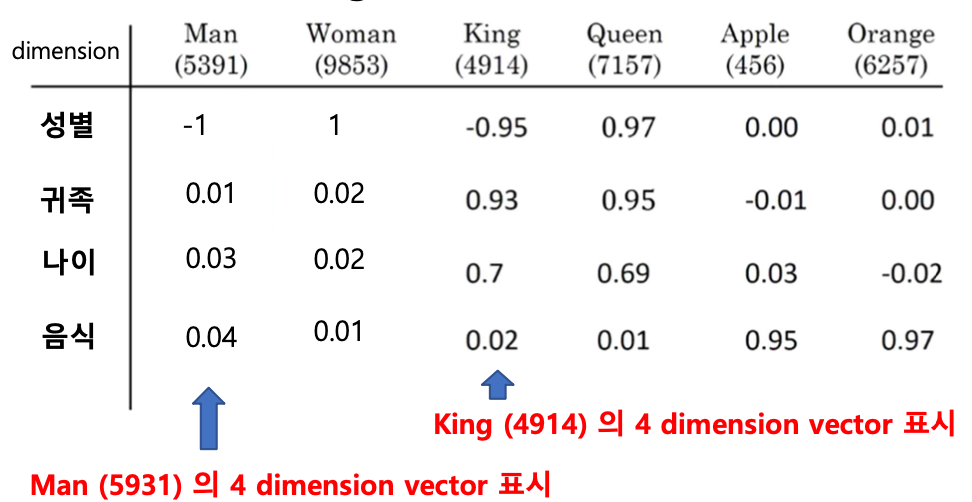



#### Embedding Layer를 이용한 vector 표현
- one-hot-vector에 projection matrix(embedding layer)를 곱해 새로운 vector 생성 --> 계산의 간편성
- projection matrix의 k번째 row가 k번째 단어에 대응하는 weight임

### Word2Vec
: 2013년 구글에서 개발한 Word embedding방법
- one-hidden layer의 shallow network --> 최초의 neural embedding model
- 매우 큰 corpus(ex. 10억, 100억 단어)에서 자동 학습 (*비지도 학습*)
- 중심단어로 주변단어를(skip-gram), 주변단어로 중심단어를(CBOW) 예측하는 과정에서 단어를 벡터로 임베딩하는 두가지 방법
- 임베딩된 단어의 내적(inner product)이 코사인 유사도가 되도록 함

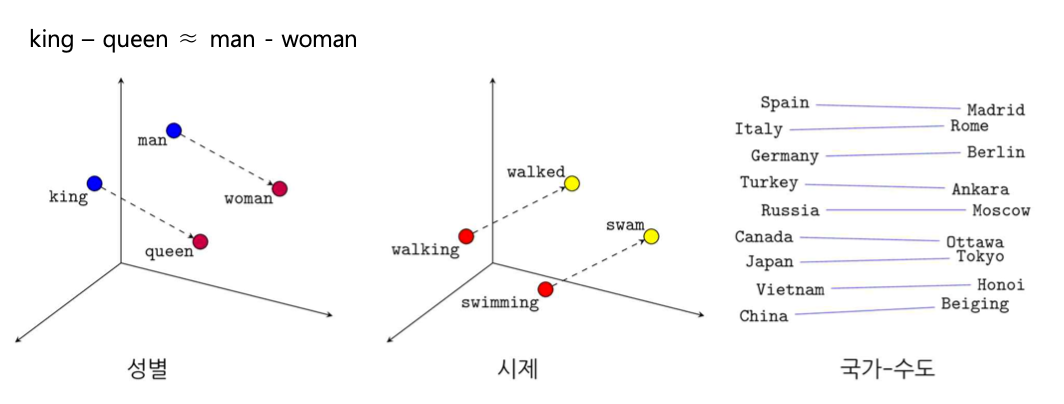

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import re

2023-08-28 10:20:29.319843: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Toy 말뭉치

In [15]:
corpus = ['king is a very strong man', 
          'queen is a wise and pretty woman', 
          'boy is a young man',
          'girl is a young and pretty woman',
          'prince is young and will be a strong and wise king',
          'princess is a young woman and will be a pretty and wise queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be a king',
          'princess is a girl will be a queen']

# corpus = ['왕은 매우 강한 남자이다', 
#           '여왕은 현명한 예쁜 여자이다', 
#           '소년은 젊은 남자이다',
#           '소녀는 젊은 예쁜 여자이다',
#           '왕자는 젊고 현명한 왕이 될 것이다',
#           '공주는 젊고 예쁜 현명한 여왕이 될 것이다',
#           '남자는 강하다', 
#           '여자는 예쁘다',
#           '왕자는 왕이 될 소년이다',
#           '공주는 왕비가 될 소녀이다']

In [16]:
cleaned_corpus = []
for text in corpus:
    print(text)
    text = re.sub(r'[^a-zA-Z]', '', text)  #영문
    #text = re.sub(r'[^a가-힣]', '', text)  #한글
    cleaned_corpus.append(text.lower())

king is a very strong man
queen is a wise and pretty woman
boy is a young man
girl is a young and pretty woman
prince is young and will be a strong and wise king
princess is a young woman and will be a pretty and wise queen
man is strong
woman is pretty
prince is a boy will be a king
princess is a girl will be a queen


### stopword 제거

In [ ]:
# from konlpy.tag import Okt
# okt = Okt()
# okt.morphs

In [17]:
stop_words = ['is', 'a' ,'will', 'be', 'and']
#stop_words = ['은', '가', '이다', '는', '이', '될']

results = []
    
for text in corpus:
    tmp = []
    #for word in okt.morphs(text):  
    for word in text.split():
        if word not in stop_words:
            tmp.append(word)
    results.append(' '.join(tmp))

In [18]:
cleaned_corpus = results
cleaned_corpus

['king very strong man',
 'queen wise pretty woman',
 'boy young man',
 'girl young pretty woman',
 'prince young strong wise king',
 'princess young woman pretty wise queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

### vocaburary 모음 작성

In [19]:
words = []

for sentence in corpus:
    for word in sentence.split(' '):
        words.append(word)

words = list(set(words))
words

['boy',
 'man',
 'will',
 'pretty',
 'young',
 'a',
 'and',
 'is',
 'queen',
 'woman',
 'girl',
 'be',
 'strong',
 'king',
 'prince',
 'princess',
 'very',
 'wise']

### word-to-index, index-to-word 작성

- word 를 index 로 변환  

- sentence 를 word index 로 변환  

- window size 에 따라 train data 생성

In [20]:
word2index = dict((w, i) for i, w in enumerate(words))
index2word = dict((i, w) for i, w in enumerate(words))

In [21]:
word2index

{'boy': 0,
 'man': 1,
 'will': 2,
 'pretty': 3,
 'young': 4,
 'a': 5,
 'and': 6,
 'is': 7,
 'queen': 8,
 'woman': 9,
 'girl': 10,
 'be': 11,
 'strong': 12,
 'king': 13,
 'prince': 14,
 'princess': 15,
 'very': 16,
 'wise': 17}

### skip-gram 으로 training data 생성

In [23]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
sentences

[['king', 'is', 'a', 'very', 'strong', 'man'],
 ['queen', 'is', 'a', 'wise', 'and', 'pretty', 'woman'],
 ['boy', 'is', 'a', 'young', 'man'],
 ['girl', 'is', 'a', 'young', 'and', 'pretty', 'woman'],
 ['prince',
  'is',
  'young',
  'and',
  'will',
  'be',
  'a',
  'strong',
  'and',
  'wise',
  'king'],
 ['princess',
  'is',
  'a',
  'young',
  'woman',
  'and',
  'will',
  'be',
  'a',
  'pretty',
  'and',
  'wise',
  'queen'],
 ['man', 'is', 'strong'],
 ['woman', 'is', 'pretty'],
 ['prince', 'is', 'a', 'boy', 'will', 'be', 'a', 'king'],
 ['princess', 'is', 'a', 'girl', 'will', 'be', 'a', 'queen']]

In [24]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [25]:
data[:10]

[['king', 'is'],
 ['king', 'a'],
 ['is', 'king'],
 ['is', 'a'],
 ['is', 'very'],
 ['a', 'king'],
 ['a', 'is'],
 ['a', 'very'],
 ['a', 'strong'],
 ['very', 'is']]

In [26]:
import pandas as pd

df = pd.DataFrame(data, columns = ['input', 'label'])
df.head()

,input,label
0,king,is
1,king,a
2,is,king
3,is,a
4,is,very


### One hot encoding

In [27]:
from tensorflow.keras.utils import to_categorical

len(words)

18

### One hot encoding 된 train, label data

In [28]:
X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_categorical(word2index[x], len(words)))
    Y.append(to_categorical(word2index[x], len(words)))

In [29]:
print(X[:3])
print(Y[:3])

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)]
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)]


In [30]:
# convert them to numpy arrays
X_train = np.array(X)
Y_train = np.array(Y)

**시각화를 위해 hidden layer 의 unit 을 2 로 제한**

In [31]:
model = Sequential()
model.add(Dense(2, input_dim=len(words)))
model.add(Dense(len(words)))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [32]:
model.fit(X_train, Y_train, epochs=500, batch_size=3)

Epoch 1/500
75/75 [==============================] - 2s 4ms/step - loss: 10.3019 - accuracy: 0.0000e+00
Epoch 2/500
75/75 [==============================] - 0s 4ms/step - loss: 6.1182 - accuracy: 0.0000e+00
Epoch 3/500
75/75 [==============================] - 0s 4ms/step - loss: 4.6088 - accuracy: 0.0000e+00
Epoch 4/500
75/75 [==============================] - 0s 3ms/step - loss: 4.6052 - accuracy: 0.0000e+00
Epoch 5/500
75/75 [==============================] - 0s 3ms/step - loss: 4.6052 - accuracy: 0.0000e+00
Epoch 6/500
75/75 [==============================] - 0s 2ms/step - loss: 4.6052 - accuracy: 0.0000e+00
Epoch 7/500
75/75 [==============================] - 0s 2ms/step - loss: 4.6052 - accuracy: 0.0000e+00
Epoch 8/500
75/75 [==============================] - 0s 3ms/step - loss: 4.6052 - accuracy: 0.0000e+00
Epoch 9/500
75/75 [==============================] - 0s 3ms/step - loss: 4.6052 - accuracy: 0.0000e+00
Epoch 10/500
75/75 [==============================] - 0s 3ms/step - loss

### 첫번째 Hidden Layer 추출 및 weight + bias 를 vector 로 합산

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 38        
                                                                 
 dense_1 (Dense)             (None, 18)                54        
                                                                 
Total params: 92 (368.00 Byte)
Trainable params: 92 (368.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.layers[0].get_weights()

[array([[ 0.09759516, -0.5122591 ],
        [-0.13793969,  0.3278182 ],
        [-0.47414243, -0.05630961],
        [ 0.03421545, -0.27447674],
        [-0.2631005 ,  0.37151325],
        [-0.5041038 , -0.2672207 ],
        [-0.436802  ,  0.29476342],
        [ 0.35134593, -0.20351973],
        [ 0.08485625,  0.3508295 ],
        [ 0.00323852, -0.26318178],
        [ 0.13780154,  0.27730718],
        [-0.33788416, -0.10186026],
        [ 0.2780481 , -0.24140526],
        [-0.47109774, -0.13862409],
        [ 0.35496795, -0.46315977],
        [ 0.4794293 ,  0.13388005],
        [-0.09871627, -0.07394971],
        [-0.17826256, -0.01130807]], dtype=float32),
 array([-0.04886888, -0.02145517], dtype=float32)]

In [35]:
vectors= model.layers[0].get_weights()[0] + model.layers[0].get_weights()[1]
vectors[:5]

array([[ 0.04872628, -0.5337143 ],
       [-0.18680857,  0.30636305],
       [-0.5230113 , -0.07776479],
       [-0.01465343, -0.2959319 ],
       [-0.31196937,  0.35005808]], dtype=float32)

In [36]:
words

['boy',
 'man',
 'will',
 'pretty',
 'young',
 'a',
 'and',
 'is',
 'queen',
 'woman',
 'girl',
 'be',
 'strong',
 'king',
 'prince',
 'princess',
 'very',
 'wise']

In [37]:
w2v = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v['word'] = words
w2v

,x1,x2,word
0,0.048726,-0.533714,boy
1,-0.186809,0.306363,man
2,-0.523011,-0.077765,will
3,-0.014653,-0.295932,pretty
4,-0.311969,0.350058,young
5,-0.552973,-0.288676,a
6,-0.485671,0.273308,and
7,0.302477,-0.224975,is
8,0.035987,0.329374,queen
9,-0.045630,-0.284637,woman


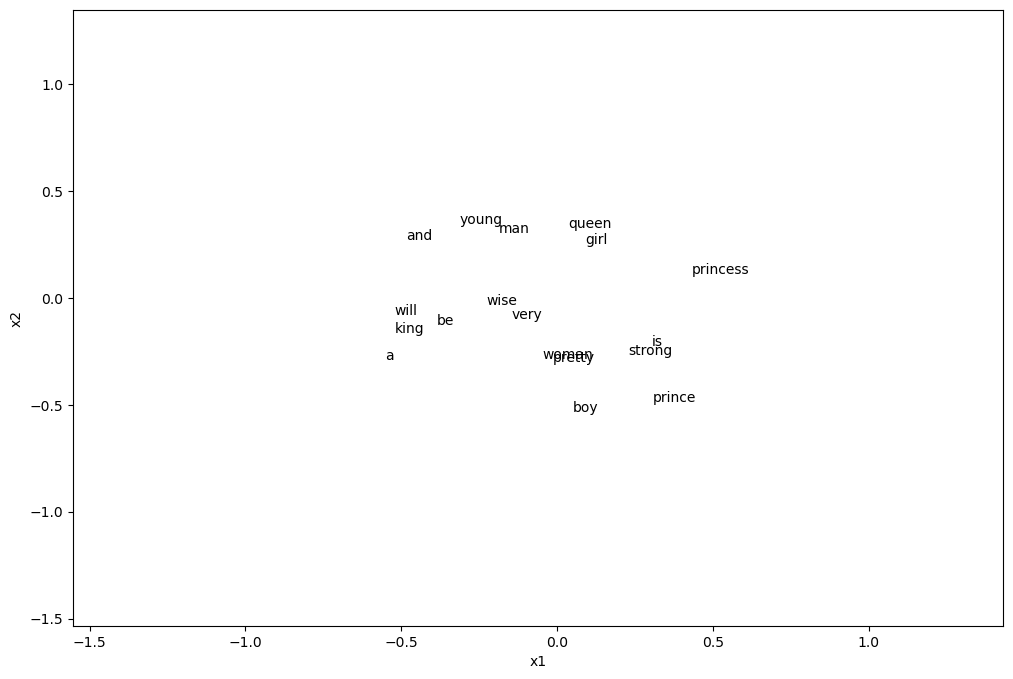

In [38]:
import matplotlib.pyplot as plt
#한글 폰트 사용
# from matplotlib import font_manager
# import matplotlib
# font_path = "C:/Windows/Fonts/malgun.ttf"                       #폰트 경로
# font_name = font_manager.FontProperties(fname=font_path).get_name()  #폰트 이름 얻어오기
# matplotlib.rc('font', family=font_name)                                 #font 지정
# matplotlib.rcParams['axes.unicode_minus'] = False               #한글사용시 마이너스 사인 깨짐 방지

fig, ax = plt.subplots(figsize=(12,8))

for word, x1, x2 in zip(w2v['word'], w2v['x1'], w2v['x2']):
    ax.annotate(word, (x1, x2))
    
PADDING = 1.0
x_axis_min = np.min(vectors, axis=0)[0] - PADDING
y_axis_min = np.min(vectors, axis=0)[1] - PADDING
x_axis_max = np.max(vectors, axis=0)[0] + PADDING
y_axis_max = np.max(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

### GloVe (Global Vectors for Word Representation)
: 미국 스탠포드대학에서 2014년 개발
- Word2Vec은 사용자가 지정한 window(주변 단어 몇개)내에서만 학습/분석이 이뤄지기 떄문에 ***말뭉치 전체의 co-occurrence(통계적 동시 등장 확률)*** 가 반영되기 어려운 단점 보완
- Co-occurrence(context window내에 두개의 단어가 동시 등장)가 있는 두단어의 word vector를 이용하여 co-occurrence값을 예측하는 regression문제 풀이

### FastText
: 2016년 facebook이 발표
- Word2Vec은 언어의 형태학적인 특성을 반영하지 못하고, 희소한 단어가 embedding되지 않는 단점
- 단어를 Bag of Characters로 보고 단어가 아닌 n-gram character를 embedding
    - apple --> "< ap", "app", "appl", "apple >", "ppl", "pple", "pple>", "ple", "ple>", "le>" (ngram 최소 3, 최대 6인 경우) 
    - 위의 split된 subwords를 이용하여 context내에 등장하는 다른 word들은 positive example, 등장하지 않는 random sampling된 단어들은 negative example로 binary classification문제 풀이
- ngram character를 embedding하게 되면 OOV를 처리할 수 있는 장점 --> 다양한 용언 형태를 가진 한국어의 특성에 잘 맞음